# A Novel Machine Learning Based Hybrid Model For Webshell Detection

In [2]:
import sys 
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split , KFold
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report                              
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from IPython import display           

In [3]:
 columns=['duration' ,'protocol_type','service' ,'flag' ,'src_bytes' ,'dst_bytes' ,'land','wrong_fragment' ,'urgent' ,'hot' 
,'num_failed_logins','logged_in','num_compromised','root_shell' ,'su_attempted' ,'num_root' ,'num_file_creations' 
 ,'num_shells','num_access_files' ,'num_outbound_cmds' ,'is_host_login','is_guest_login','count','srv_count' ,'serror_rate' 
 ,'srv_serror_rate' ,'rerror_rate' ,'srv_rerror_rate' ,'same_srv_rate' ,'diff_srv_rate' ,'srv_diff_host_rate' 
,'dst_host_count' ,'dst_host_srv_count' ,'dst_host_same_srv_rate' ,'dst_host_diff_srv_rate' ,'dst_host_same_src_port_rate' 
 ,'dst_host_srv_diff_host_rate' ,'dst_host_serror_rate' ,'dst_host_srv_serror_rate' ,'dst_host_rerror_rate' 
 ,'dst_host_srv_rerror_rate' ,'label'
         ]

In [4]:
data = pd.read_csv("data/kdd-mix.csv", names=columns) 
print(data.shape)

(111000, 42)


In [44]:
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,335,241,0,0,0,0,...,246,1.00,0.00,0.01,0.03,0.0,0.0,0.0,0.0,normal
1,0,udp,private,SF,47,44,0,0,0,0,...,255,1.00,0.00,0.58,0.00,0.0,0.0,0.0,0.0,normal
2,0,tcp,private,REJ,0,0,0,0,0,0,...,16,0.06,0.05,0.00,0.00,0.0,0.0,1.0,1.0,anomaly


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111000 entries, 0 to 110999
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     111000 non-null  int64  
 1   protocol_type                111000 non-null  object 
 2   service                      111000 non-null  object 
 3   flag                         111000 non-null  object 
 4   src_bytes                    111000 non-null  int64  
 5   dst_bytes                    111000 non-null  int64  
 6   land                         111000 non-null  int64  
 7   wrong_fragment               111000 non-null  int64  
 8   urgent                       111000 non-null  int64  
 9   hot                          111000 non-null  int64  
 10  num_failed_logins            111000 non-null  int64  
 11  logged_in                    111000 non-null  int64  
 12  num_compromised              111000 non-null  int64  
 13 

In [7]:
# find missing values exists
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
# target values
data.label.unique()

array(['normal', 'anomaly'], dtype=object)

In [46]:
# find categorical features
num_cols = data._get_numeric_data().columns
cate_cols = list(set(data.columns)-set(num_cols))
cate_cols.remove('label')
cate_cols

['service', 'protocol_type', 'flag']

In [9]:
print("----------protocol_type--------------")
print(data.protocol_type.unique())
print("----------service--------------")
print(data.service.unique())
print("----------flag--------------")
print(data.flag.unique())

----------protocol_type--------------
['tcp' 'udp' 'icmp']
----------service--------------
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
----------flag--------------
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


In [10]:
data.service.value_counts()

http         35725
private      19775
domain_u      7660
smtp          6280
ftp_data      5877
             ...  
http_8001        2
tftp_u           2
http_2784        1
harvest          1
aol              1
Name: service, Length: 70, dtype: int64

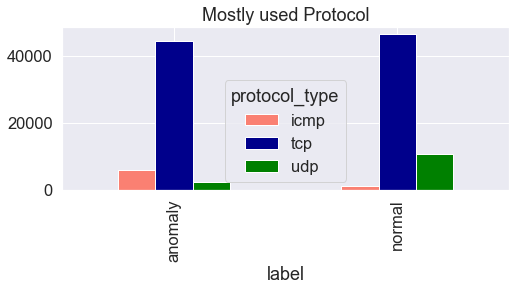

In [186]:
# creating plot of categorical variables: Protocol type 
pd.crosstab(data.label, data.protocol_type).plot(kind  = "bar",
                                                  figsize = (8, 3),
                                                  color=["salmon", "darkblue","green"]);
plt.title("Mostly used Protocol");
plt.savefig("images/protocol.png");


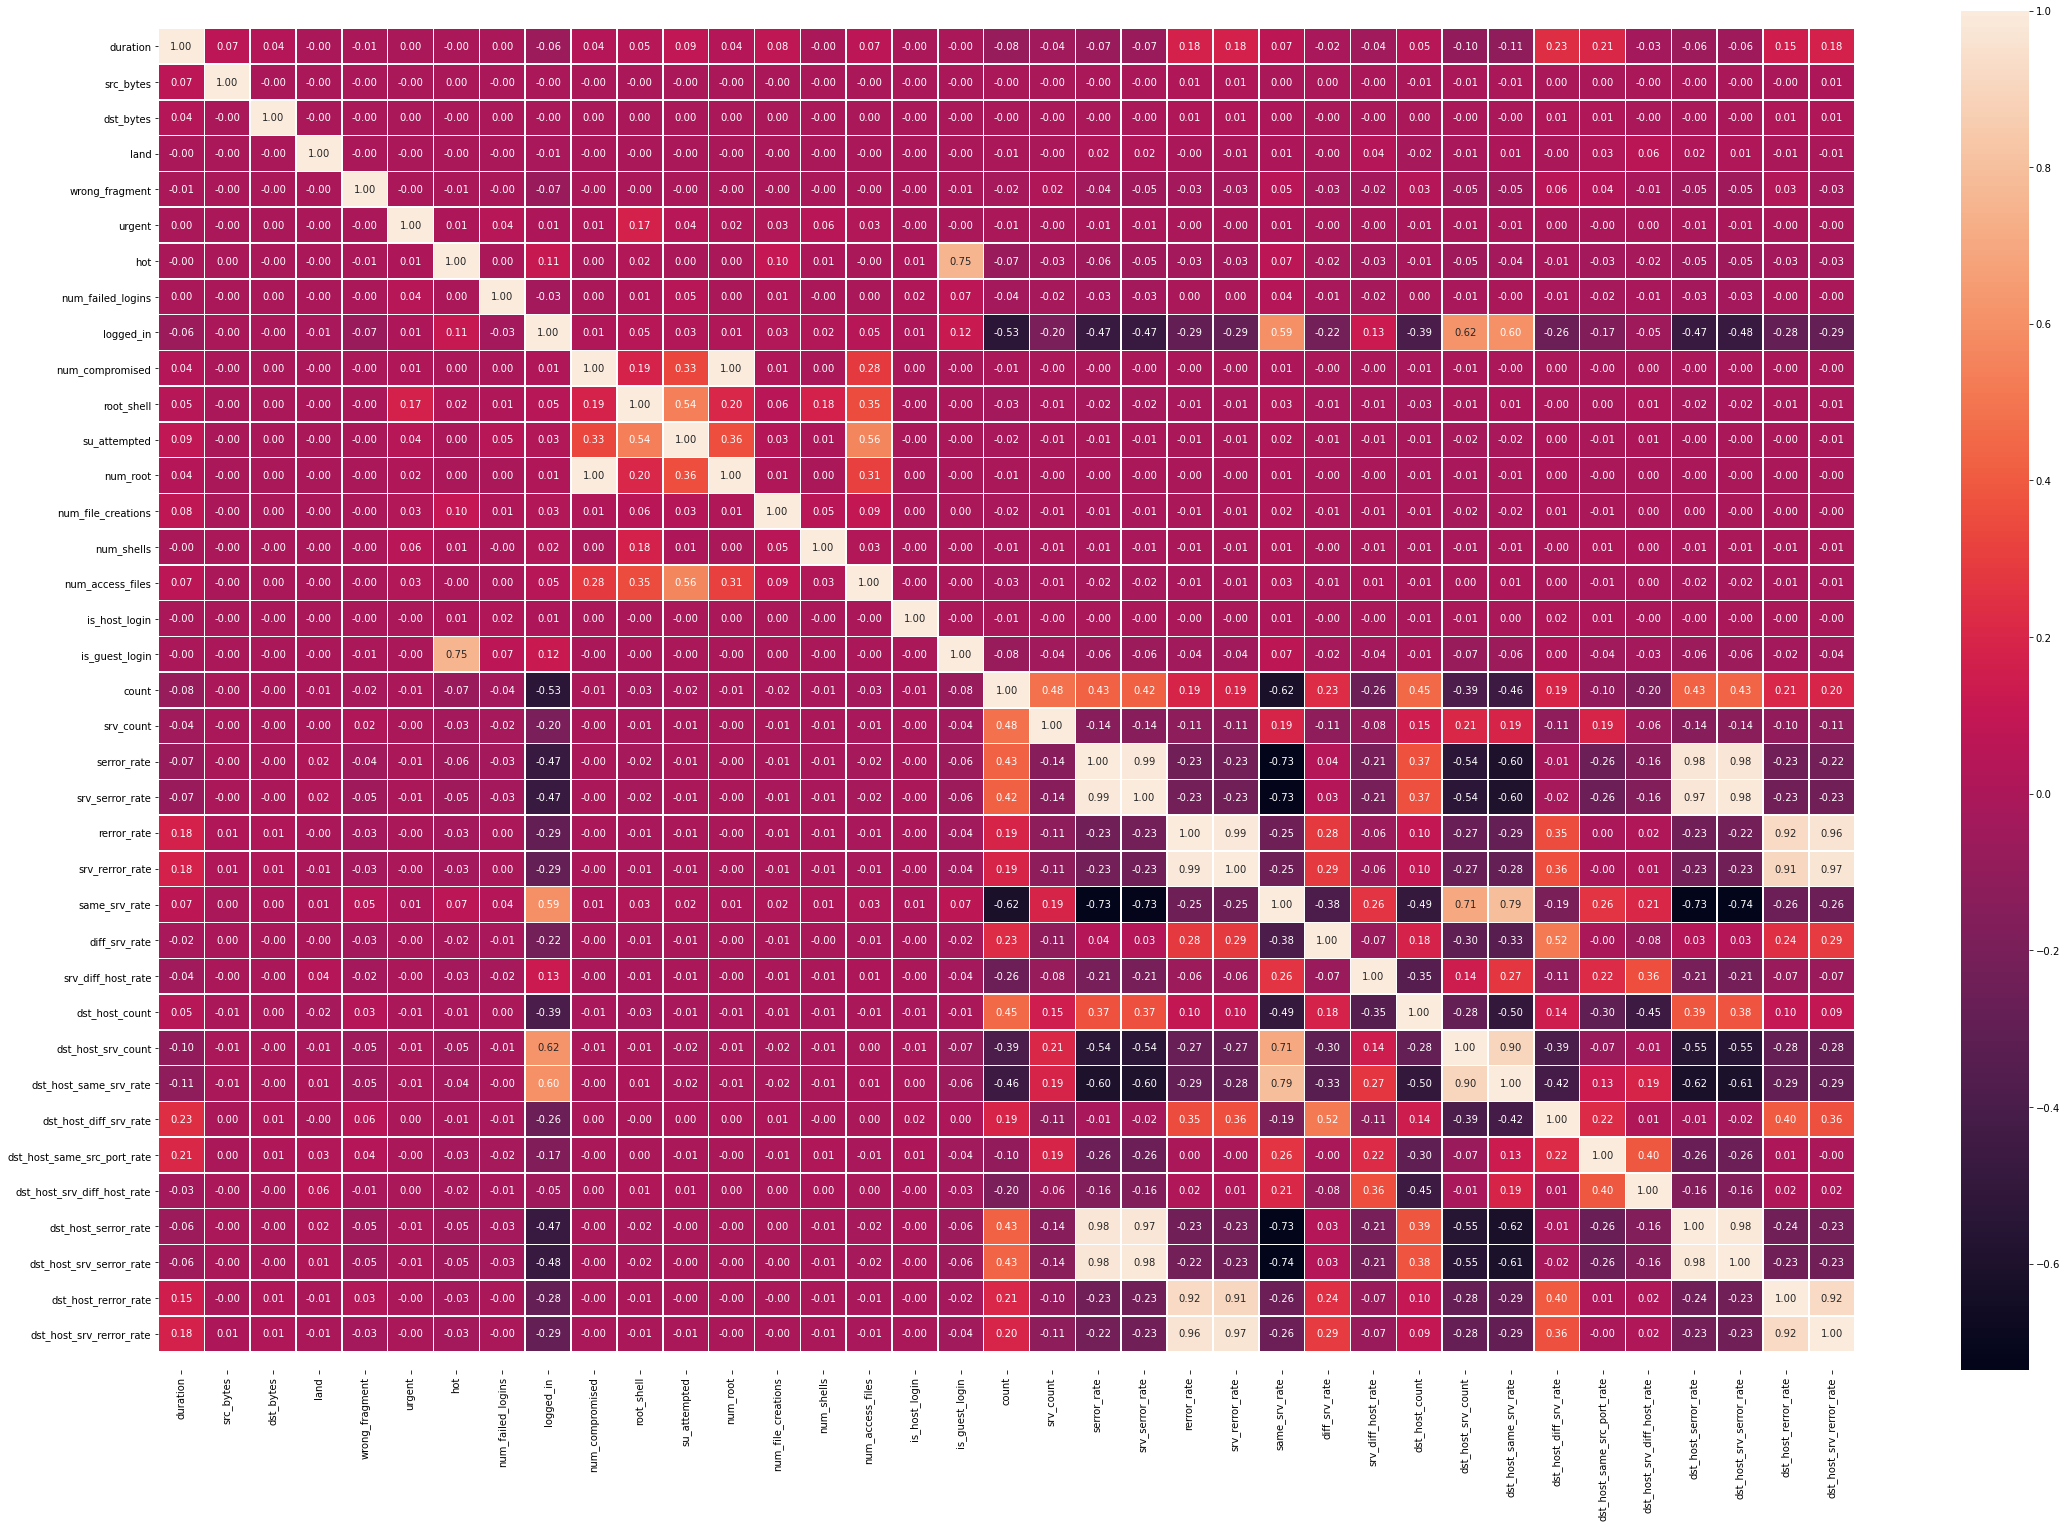

In [11]:
'''
Correlation Matrix
'''
data = data[[col for col in data if data[col].nunique()>1]]
corr_matrix =data.corr()
fig, lax = plt.subplots(figsize =(38, 25))
ax = sns.heatmap(corr_matrix, 
                annot = True,
                linewidths = 0.5,
                fmt =".2f",
                ); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig("images/correlation.png");


In [48]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)
np.triu(np.ones((3,3)), k=1).astype(np.bool)

In [49]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['num_root', 'num_file_creations', 'num_shells', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate']


In [50]:
for i in to_drop:
    data= data.drop(i, axis=1)
data.head(1)
data = data.drop(["num_outbound_cmds"], axis = 1)


In [51]:
data.head(1)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,335,241,0,0,0,0,...,91,246,1.0,0.0,0.01,0.03,0.0,0.0,0.0,normal


In [52]:
# drop the last result and add remaining to predictors
predictors_pre = data.drop(["label", "service"],axis=1)
# add the result to target
target = data["label"]
# split to train n test 
predictors_pre.head(1)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,SF,335,241,0,0,0,0,0,...,0.11,91,246,1.0,0.0,0.01,0.03,0.0,0.0,0.0


In [53]:
from sklearn import preprocessing
protocol_type = predictors_pre.iloc[:,1:2].values
# protocol_type
ohe = preprocessing.OneHotEncoder()
protocol_type = ohe.fit_transform(protocol_type).toarray()
protocol_type = pd.DataFrame(protocol_type)
protocol_type.columns = ['icmp', 'tcp', 'udp']
protocol_type
predictors = predictors_pre.drop(["protocol_type","flag"], axis = 1)
predictors
predictors = predictors.join(protocol_type)
flag = predictors_pre.iloc[:,2:3].values
flag = ohe.fit_transform(flag).toarray()
flag = pd.DataFrame(flag) 
flag.columns = ['OTH','REJ','RSTO','RSTR','RSTOS0', 'S0', 'S1', 'S2', 'S3', 'SF','SH']
predictors = predictors.join(flag)
predictors.head(3)                                                      

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTR,RSTOS0,S0,S1,S2,S3,SF,SH
0,0,335,241,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,47,44,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.90,random_state=10)

In [61]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTR,RSTOS0,S0,S1,S2,S3,SF,SH
142,0,105,147,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
193,0,355,4696,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152,7334,0,44,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
299,4,30,93,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
47,0,127,174,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,0,126,174,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93,0,262,26622,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,0,372,234,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
from sklearn. preprocessing import StandardScaler
# Feature Scaling
# sc = StandardScaler()  
import pickle
sc = pickle.load(open('pickle/scaler.pk1', 'rb'))
# X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
X_test

array([[-1.12044658e-01, -7.73480222e-03, -5.40818934e-03, ...,
        -3.76952930e-02,  8.13530659e-01, -4.69124582e-02],
       [-1.12044658e-01, -7.68550723e-03, -2.02630847e-03, ...,
        -3.76952930e-02,  8.13530659e-01, -4.69124582e-02],
       [ 2.79829525e+00, -7.75550611e-03, -5.48476303e-03, ...,
        -3.76952930e-02,  8.13530659e-01, -4.69124582e-02],
       ...,
       [-1.12044658e-01, -7.75550611e-03, -5.51747412e-03, ...,
        -3.76952930e-02, -1.22920997e+00, -4.69124582e-02],
       [-1.12044658e-01, -7.68215517e-03, -5.34351059e-03, ...,
        -3.76952930e-02,  8.13530659e-01, -4.69124582e-02],
       [-1.12044658e-01, -7.73145016e-03, -5.38811662e-03, ...,
        -3.76952930e-02,  8.13530659e-01, -4.69124582e-02]])

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import dataframe_image as dfi

In [89]:
# model_dict = {
    'logistic_regression':{
        'model':LogisticRegression(solver = 'saga', multi_class='auto', max_iter= 10000),
        'params':{
            'C' :[7,5,10]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy'],
            'max_depth':[17,12, 15]
        }
    },
    'naive_bayes_guassian':{
        'model':GaussianNB(),
        'params':{}
    },
    'naive_bayes_bernouli':{
        'model':BernoulliNB(binarize=.1),
        'params':{}
    },
    'knn':{
    'model':KNeighborsClassifier(),
    'params':{
        'n_neighbors':[2,4, 6]
       }
    }
}


In [90]:
from sklearn.model_selection import GridSearchCV
scores= []
for mn, mp in model_dict.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model':mn,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
        'best_estimator':clf.best_estimator_
        
    })
exp6 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
exp6.dfi.export('exp6.png')

In [21]:
from IPython.display import Image
from IPython.display import display

'-------------------exp1--------------------'

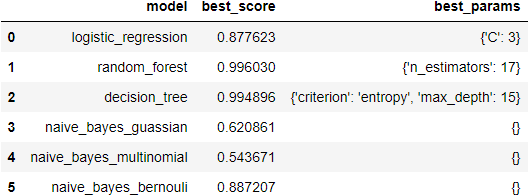

'-------------------exp2------------------'

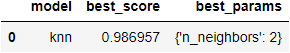

'------------------exp3-------------------'

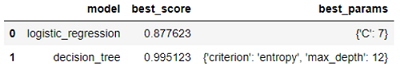

'------------------exp4-------------------'

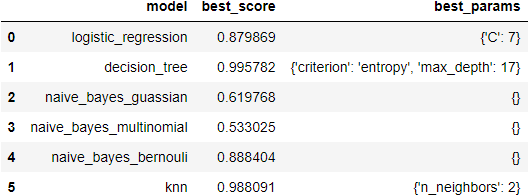

'------------------exp5-------------------'

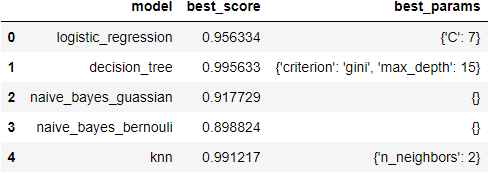

In [22]:
a = Image(filename = 'exp1.png')
b = Image(filename = 'exp2.png')
c = Image(filename = 'exp3.png')
d = Image(filename = 'exp4.png')
e = Image(filename = 'exp5.png')
display("-------------------exp1--------------------",a,"-------------------exp2------------------", 
        b,"------------------exp3-------------------", c ,"------------------exp4-------------------", 
        d, "------------------exp5-------------------", e)

# Hyperparameter Tuning 
 logisitc regressor,naive_bayes_bernouli , guassian, decision tree and knn are chosen due to their high performance 

#### Tuning Logistic Regression

In [20]:
log_reg_grid = {
                "C": np.logspace(-4, 4, 20),
               "solver":["liblinear", "saga"],
               "multi_class":['auto'],
                "max_iter": [10000]
               }

np.random.seed(42)

# Setup Random hyperparameter search for LogisticRegression
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions = log_reg_grid,
                              cv = 5,
                              n_iter = 20,
                              verbose = True)

# Fit random hyperparameter search for logisticRegression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [10000],
                                        'multi_class': ['auto'],
                                        'solver': ['liblinear', 'saga']},
                   verbose=True)

In [21]:
tuned_lg_grid = rs_log_reg.best_params_
tuned_lg_grid

{'solver': 'liblinear',
 'multi_class': 'auto',
 'max_iter': 10000,
 'C': 0.004832930238571752}

In [ ]:
# tuned_lg_grid = {'solver': 'saga',
#  'multi_class': 'auto',
#  'max_iter': 10000,
#  'C': 0.004832930238571752}

In [22]:
score_lr = rs_log_reg.score(X_test, Y_test)
score_lr

0.9417117117117118

<!-- # Tuning DT
#  ideal min_samples_split values tend to be between 1 to 40
# that the ideal min_samples_leaf values tend to be between 1 to 20 for the CART algorithm. This paper also indicates that min_samples_split and min_samples_leaf are the most responsible for the performance of the
# final trees from their relative importance analysis
# max depth experimental -->

### Tuning DT
ideal min_samples_split values tend to be between 1 to 40
that the ideal min_samples_leaf values tend to be between 1 to 20 for the CART algorithm. This paper also indicates that min_samples_split and min_samples_leaf are the most responsible for the performance of the
final trees from their relative importance analysis
max depth experimental

In [23]:
dt_grid = {
            'criterion':['gini', 'entropy'],
            'max_depth':[11, 12, 14],
          "min_samples_split":np.arange(2,40, 2),
          "min_samples_leaf":np.arange(1, 20, 2),
           "max_features": ['auto', 'sqrt', 'log2']
}

# Setup random.seed(42)
np.random.seed(42)

#  Setup random hyperparameter search for RandomForestClassifier
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(), 
                           param_distributions=dt_grid,
                           cv = 5,
                           n_iter= 20,
                           verbose =True)
# Fit random hyperparameter search model RandomForestClassifier()

rs_dt.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [11, 12, 14],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38])},
                   verbose=True)

In [24]:
tuned_dt_grid = rs_dt.best_params_
tuned_dt_grid

{'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'gini'}

In [25]:
score_dt = rs_dt.score(X_test, Y_test)
score_dt

0.9905855855855856

### Tuning Naive Bayes Bernouli

In [26]:
nb_grid = {
    'binarize':[0.0, 0.1, 0.2]
}
rs_nb = RandomizedSearchCV(estimator = BernoulliNB(),
                           param_distributions=nb_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose =True)
rs_nb.fit(X_train, Y_train)

C:\Users\Pooja K P\A_ml_course\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=BernoulliNB(), n_iter=20,
                   param_distributions={'binarize': [0.0, 0.1, 0.2]},
                   verbose=True)

In [27]:
tuned_nb_grid = rs_nb.best_params_
tuned_nb_grid

{'binarize': 0.1}

In [28]:
score_nb = rs_nb.score(X_test, Y_test)
score_nb

0.8901351351351351

### Tuning Naive Bayes guassian

In [29]:
# nb_classifier = GaussianNB()

nbg_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_gnb = GridSearchCV(estimator=GaussianNB(), 
                  param_grid=nbg_grid, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_gnb.fit(X_train, Y_train)

gs_gnb.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 2.848035868435805e-09}

In [30]:
tuned_nbg_grid = gs_gnb.best_params_
tuned_nbg_grid

{'var_smoothing': 2.848035868435805e-09}

In [31]:
score_nbg = gs_gnb.score(X_test, Y_test)
score_nbg

0.9156306306306307

### Tuning KNN

In [32]:
knn_grid = {'n_neighbors':list(range(2,30)),
          'leaf_size': list(range(1, 50)),
          'weights':['distance'],
          'algorithm':['kd_tree','brute'],
          'n_jobs':[-1],
            }
#Making models with hyper parameters sets
rs_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                       param_distributions = knn_grid,
                       cv = 5,
                       n_iter = 20,
                        verbose = True
                       )
#Learning 
rs_knn.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'algorithm': ['kd_tree', 'brute'],
                                        'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_jobs': [-1],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11, 12, 13, 14, 15,
                                                        16, 17, 18, 19, 20, 21,
                                                        22, 23, 24, 25, 26, 27,
                                                        28, 29],
                           

In [49]:
# dir(rs_knn)

In [33]:
tuned_knn_grid = rs_knn.best_params_
tuned_knn_grid

{'weights': 'distance',
 'n_neighbors': 6,
 'n_jobs': -1,
 'leaf_size': 43,
 'algorithm': 'kd_tree'}

In [34]:
score_knn = rs_knn.score(X_test, Y_test)
score_knn

0.9904954954954955

### From our experiments its found that KNN has out performed all models

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
kestimators = []
kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=42)
kn_1 = KNeighborsClassifier(n_neighbors = 4,weights='distance',algorithm='ball_tree',leaf_size=48,n_jobs=-1)
kestimators.append(('kn',kn_1))
kn_2 = KNeighborsClassifier(n_neighbors = 8,weights='distance',algorithm='auto',leaf_size=19,n_jobs=-1)
kestimators.append(('kn2', kn_2))
kn_3 = KNeighborsClassifier(n_neighbors = 1,weights='distance',algorithm='brute' ,leaf_size=21, n_jobs=-1)
kestimators.append(('kn3', kn_3))
kn_4 = KNeighborsClassifier(n_neighbors = 1,weights='uniform',algorithm='brute',leaf_size=48,n_jobs=-1)
kestimators.append(('kn4', kn_4)) 
kn_5 = KNeighborsClassifier(**tuned_knn_grid)
kestimators.append(('kn5', kn_5)) 
kensemble = VotingClassifier(kestimators, voting='hard')
kensemble.fit(X_train,Y_train)

VotingClassifier(estimators=[('kn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   leaf_size=48, n_jobs=-1,
                                                   n_neighbors=4,
                                                   weights='distance')),
                             ('kn2',
                              KNeighborsClassifier(leaf_size=19, n_jobs=-1,
                                                   n_neighbors=8,
                                                   weights='distance')),
                             ('kn3',
                              KNeighborsClassifier(algorithm='brute',
                                                   leaf_size=21, n_jobs=-1,
                                                   n_neighbors=1,
                                                   weights='distance')),
                             ('kn4',
                              KNeighborsClassifier(algorithm='br

In [38]:
score_k_en = kensemble.score(X_test, Y_test)
score_k_en

0.9907657657657658

##  Hybrid Model 
#### Models ensembled:
1. KNN
2. Decision Tree

In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
estimators = []
dt = DecisionTreeClassifier(**tuned_dt_grid)
knn = KNeighborsClassifier(**tuned_knn_grid)
knn2 = KNeighborsClassifier(n_neighbors = 3,weights='distance',algorithm='kd_tree' ,leaf_size=16, n_jobs=-1)
estimators.extend([('Dt', dt),('KNN', knn), ('knn2', knn2)])
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train,Y_train)

VotingClassifier(estimators=[('Dt',
                              DecisionTreeClassifier(max_depth=12,
                                                     max_features='sqrt',
                                                     min_samples_split=20)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   leaf_size=43, n_jobs=-1,
                                                   n_neighbors=6,
                                                   weights='distance')),
                             ('knn2',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   leaf_size=16, n_jobs=-1,
                                                   n_neighbors=3,
                                                   weights='distance'))])

In [40]:
score_hybrid = ensemble.score(X_test, Y_test)
score_hybrid 

0.9910360360360361

In [41]:
score_all = [score_nb,score_nbg,score_lr,score_dt,score_k_en,score_knn,score_hybrid]
algorithms = ["NaiveBayes Bernouli", "NaiveBayes Guassian","Logistic Regression","Decision Tree","KNN ensemble","KNN","Hybrid Model"]    

In [42]:
score_table = []
for i in range(6):
    score_table.append({
        'model':algorithms[i],
        'accuracy score':score_all[i]*100
    })
score_df = pd.DataFrame(score_table, columns =['model', 'accuracy score'])
score_df.dfi.export('images/score_res.png')
score_df

,model,accuracy score
0,NaiveBayes Bernouli,89.013514
1,NaiveBayes Guassian,91.563063
2,Logistic Regression,94.171171
3,Decision Tree,99.058559
4,KNN ensemble,99.076577
5,KNN,99.049550


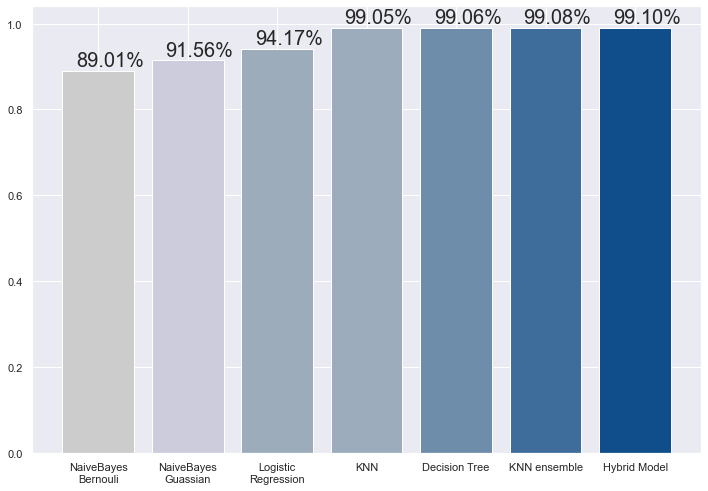

<Figure size 576x504 with 0 Axes>

In [142]:
import matplotlib.pyplot as plt
sns.set()
score_all = [score_nb,score_nbg,score_lr,score_knn,score_dt,score_k_en,score_hybrid]
algorithms = ["NaiveBayes\nBernouli", "NaiveBayes\nGuassian","Logistic\nRegression","KNN","Decision Tree","KNN ensemble","Hybrid Model"]    
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (10,7))
ax.bar(algorithms,score_all, color = ['#CCCCCC','#CCCCDD', '#9DACBB','#9DACBD', '#6E8DAB','#3F6D9B','#104E8B'] )
''' 
plt.text() , you need to give (x,y) location , where you want to put the numbers,
So here index will give you x pos and data+1 will provide a little gap in y axis.
'''

for index,data in enumerate(score_all):
    plt.text(x=index-0.25 , y =data+0.01 , s="{:.2%}".format(data) , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()
plt.savefig("images/graph_comparison.png");


In [143]:
y_preds = ensemble.predict(X_test)
hm_cm = confusion_matrix(Y_test, y_preds)

In [144]:
hm_cm

array([[10372,    93],
       [  106, 11629]], dtype=int64)

In [152]:
ensemble.classes_

array(['anomaly', 'normal'], dtype=object)

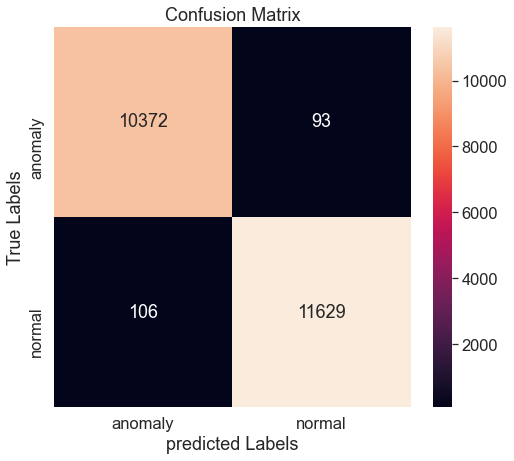

In [173]:
ax = plt.subplot()
sns.heatmap(hm_cm, annot = True, fmt='g', ax=ax);
ax.set_xlabel('predicted Labels');
ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['anomaly','normal']);
ax.yaxis.set_ticklabels(['anomaly', 'normal']);
plt.savefig("images/confusion_matrix.png");


In [169]:
Y_test.value_counts()

normal     11735
anomaly    10465
Name: label, dtype: int64

In [150]:
cr = classification_report(Y_test, y_preds,digits=4)
print(cr)                                                  

              precision    recall  f1-score   support

     anomaly     0.9899    0.9911    0.9905     10465
      normal     0.9921    0.9910    0.9915     11735

    accuracy                         0.9910     22200
   macro avg     0.9910    0.9910    0.9910     22200
weighted avg     0.9910    0.9910    0.9910     22200



### KNN Parameters Study

In [83]:
# Let's tune KNN
train_scores=[]
test_scores = []
train_scores_l=[]
test_scores_l = []
train_scores_a=[]
test_scores_a = []

# Create a list of different values for n_neighbors

neighbors=range(1,15)
# Setup KNN instance
knn = KNeighborsClassifier()
# Loop through  different neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i,weights='distance', algorithm='kd_tree', n_jobs=-1)
    #Fit the algorithm
    knn.fit(X_train, Y_train)
    #Update the training scores list
    train_scores.append(knn.score(X_train, Y_train))
    # Update the test scores list
    test_scores.append(knn.score(X_test, Y_test))    

Maximum KNN score on the test data : 99.09%


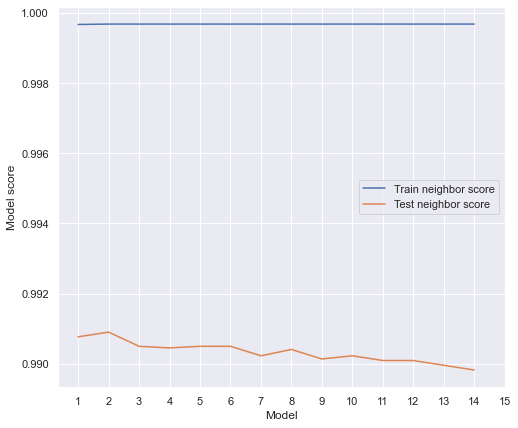

In [84]:

plt.plot(neighbors, train_scores,label = "Train neighbor score")
plt.plot(neighbors, test_scores,label = "Test neighbor score")
plt.xticks(np.arange(1,16,1))
plt.legend();
plt.xlabel("Model")
plt.ylabel("Model score")
plt.savefig("images/nnf.png");
print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

In [98]:
# Let's tune KNN
train_scores_dtt=[]
test_scores_dtt = []

# Create a list of different values for n_neighbors

min_samples_split=range(2,40, 1)

# Setup KNN instance
dtt = DecisionTreeClassifier()
# Loop through  different neighbors
for i in min_samples_split:
    dtt.set_params(min_samples_split=i,max_features='sqrt')
    #Fit the algorithm
    dtt.fit(X_train, Y_train)
    
    #Update the training scores list
    train_scores_dtt.append(dtt.score(X_train, Y_train))
    
    # Update the test scores list
    test_scores_dtt.append(dtt.score(X_test, Y_test))

Maximum DT score on the test data : 99.31%


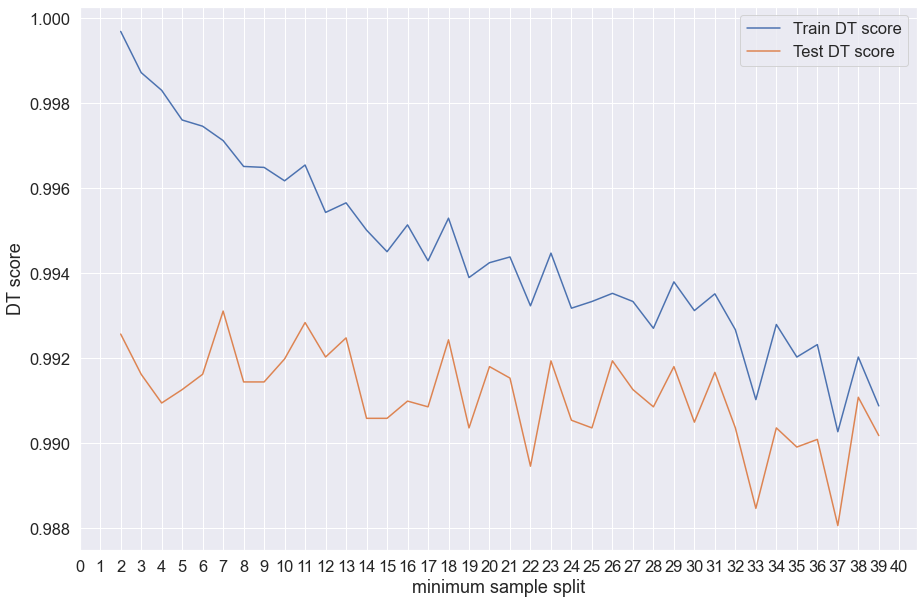

In [196]:
plt.figure(figsize=(15, 10))
plt.plot(min_samples_split, train_scores_dtt,label= "Train DT score")
plt.plot(min_samples_split, test_scores_dtt,label= "Test DT score")
plt.xticks(np.arange(0,41,1))
plt.xlabel("minimum sample split")
plt.ylabel("DT score")
plt.legend();
plt.savefig("images/dtt_split.png");
print(f"Maximum DT score on the test data : {max(test_scores_dtt)*100:.2f}%")

In [151]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=42)
cv_acc = cross_val_score(ensemble,
                        X_train,
                        Y_train,
                        cv=kfold,
                        scoring = "accuracy")
cv_acc  

array([0.99144144, 0.99268018, 0.99076577, 0.99268018, 0.99065315,
       0.99121622, 0.9911036 , 0.99054054, 0.99177928, 0.99132883])

In [40]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9936486519752649

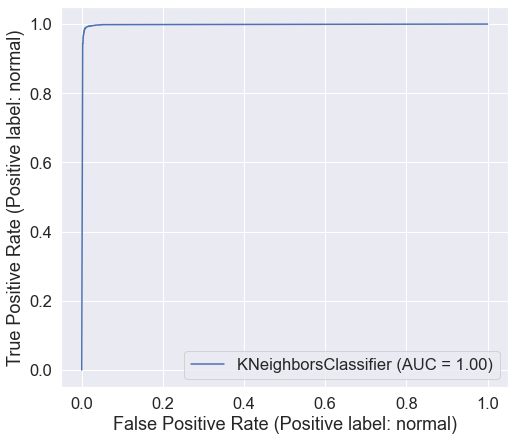

In [175]:
from sklearn.metrics import plot_roc_curve 
plot_roc_curve(knn, X_test, Y_test);
plt.savefig("images/knn_roc.png");


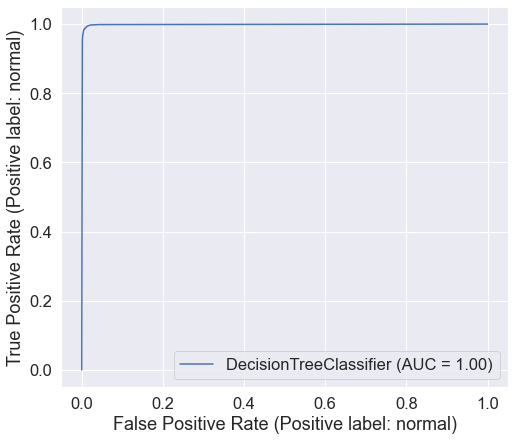

In [176]:
plot_roc_curve(dtt, X_test, Y_test);
plt.savefig("images/dtt.png");